In [1]:
import os
import re 

from utils import SpecialTokenizer, num_tokens_from_string, get_arts_dict_clean

from tqdm import tqdm
import tiktoken

from collections import Counter

In [25]:
tokenizer = SpecialTokenizer()

In [6]:
def get_arts_dict_clean(file_path):  
    art_regex = re.compile(r"(\nArt.*\n)")
    raw_text = open(file_path, "r").read()
    raw_text1 = re.sub("\n\n\n", "\n\n", raw_text)
    raw_text1 = re.sub(r"(\nCapo|\nCAPO|Titolo|Sezione|Libro|\nIndice|§)(.+\n)?", "", raw_text)
    raw_text1 = re.sub(r"(Art|Artt)\..+ \((abrogat(o|i)|omissis)\)", "", raw_text1)
    raw_text1 = re.sub(r"\(.*abrogat.*\)\.", "", raw_text1)
    
    titles = re.findall(art_regex, raw_text1)
    bodies = re.sub(art_regex, "ART_TITLE\n", raw_text1).split("ART_TITLE\n")
    titles = [t.strip() for t in titles]
    bodies = [b.strip() for b in bodies[1:]]
    #bodies = [re.sub(r"\[Art.* abrogat(o|i).*\n\]", "", b) for b in bodies]
    bodies = [re.sub(r"(\[.*Art.*\])(.*\n)", "", b) for b in bodies]
    
    arts_final = dict(zip(titles, bodies))
    assert len(titles) == len(bodies), "Something went wrong"
    return arts_final

In [7]:
CC_BOOKS_DIR = "./cc"
cc_books_arts = []
big_dic = {}
for book in os.listdir(CC_BOOKS_DIR):
    name = book.replace(".txt", "")
    arts = get_arts_dict_clean(os.path.join(CC_BOOKS_DIR, book))
    print(f"Found {len(arts)} available articles for {book}")
    cc_books_arts.append(arts)
    big_dic[name] = arts

Found 395 available articles for cc_libro_I.txt
Found 345 available articles for cc_libro_II.txt
Found 359 available articles for cc_libro_III.txt
Found 888 available articles for cc_libro_IV.txt
Found 627 available articles for cc_libro_V.txt
Found 322 available articles for cc_libro_VI.txt


In [8]:
import json 
with open("cc_books_clean_whole2.json", "w") as outfile:
    json.dump(big_dic, outfile, indent = 1)


In [9]:
cc_books_arts[0]["Art. 11 Persone giuridiche pubbliche"]

'Le Province e i Comuni, nonché gli enti pubblici riconosciuti come persone giuridiche, godono dei diritti secondo le leggi e gli usi osservati come diritto pubblico (824  e seguenti).\n\n\n Articolo abrogato dall’art. 11, D.P.R del 10 febbraio 2000, n. 361. Il precedente testo recitava:"Le associazioni, le fondazioni e le altre istituzioni di carattere privato acquistano la personalità giuridica mediante il riconoscimento concesso con decreto del Presidente della Repubblica. Per determinate categorie di enti che esercitano la loro attività nell’ambito della Provincia, il Governo può delegare ai prefetti la facoltà di riconoscerli con loro decreto"'

In [12]:
re.sub(r"(\[.*Art.*\]).*\n", "",cc_books_arts[0]["Art. 11 Persone giuridiche pubbliche"])

'Le Province e i Comuni, nonché gli enti pubblici riconosciuti come persone giuridiche, godono dei diritti secondo le leggi e gli usi osservati come diritto pubblico (824  e seguenti).\n\n\n Articolo abrogato dall’art. 11, D.P.R del 10 febbraio 2000, n. 361. Il precedente testo recitava:"Le associazioni, le fondazioni e le altre istituzioni di carattere privato acquistano la personalità giuridica mediante il riconoscimento concesso con decreto del Presidente della Repubblica. Per determinate categorie di enti che esercitano la loro attività nell’ambito della Provincia, il Governo può delegare ai prefetti la facoltà di riconoscerli con loro decreto"'

In [41]:
cc_books_arts[0]["Art. 1 Capacità giuridica"]

'La capacità giuridica si acquista dal momento della nascita.\nI diritti che la legge riconosce a favore del concepito sono subordinati all’evento della nascita (462, 687, 715, 784).'

In [5]:
# def num_tokens_from_string(string: str, encoding_name: str = "cl100k_base") -> int:
#     encoding = tiktoken.get_encoding(encoding_name)
#     num_tokens = len(encoding.encode(string))
#     return num_tokens

In [71]:
stats = {}
book_count = 0
sents_distro = {}
for book in cc_books_arts:

    book_count += 1
    book_name = f"book {book_count}"
    stats[book_name] = {}
    lens = []
    token_counts = []
    word_counts = []
    
    for art in tqdm(book):
        
        sents = tokenizer.sentence_tokenize(book[art])
        lens.append(len(sents))
        token_counts.append(num_tokens_from_string(book[art]))
        word_counts.append(len(tokenizer.word_tokenize(book[art])))
    
    sents_distro[book_name] = Counter(lens)
    stats[book_name]["N. of arts"] = len(lens)
    stats[book_name]["Avg Sents Count"] = sum(lens)/ len(lens)
    stats[book_name]["Avg Word Count"] = sum(word_counts) / len(word_counts)
    stats[book_name]["Avg Tokens Count"] = sum(token_counts) / len(token_counts)   


100%|██████████| 322/322 [00:06<00:00, 53.56it/s]


In [72]:
sents_distro

{'book 1': Counter({1: 121,
          2: 114,
          3: 55,
          4: 44,
          5: 22,
          6: 16,
          8: 8,
          7: 7,
          10: 4,
          9: 1,
          14: 1,
          12: 1,
          0: 1}),
 'book 2': Counter({1: 117, 2: 106, 3: 57, 4: 28, 5: 18, 6: 9, 7: 7, 8: 3}),
 'book 3': Counter({2: 110,
          1: 97,
          3: 80,
          4: 32,
          5: 20,
          6: 8,
          8: 4,
          7: 3,
          11: 1,
          0: 1,
          10: 1,
          9: 1,
          13: 1}),
 'book 4': Counter({1: 359,
          2: 276,
          3: 130,
          4: 51,
          5: 35,
          6: 25,
          8: 3,
          7: 3,
          23: 1,
          77: 1,
          15: 1,
          11: 1,
          20: 1,
          0: 1}),
 'book 5': Counter({1: 179,
          2: 155,
          3: 111,
          4: 59,
          5: 32,
          7: 21,
          6: 20,
          9: 10,
          8: 9,
          10: 8,
          0: 6,
          11: 5

In [22]:
import pandas as pd
pd.DataFrame(stats).T

,N. of arts,Avg Len. Sentences,Avg Word Count,Avg Len. Tokens
book 1,395.0,2.751899,86.562025,135.546835
book 2,345.0,2.402899,73.475362,112.701449
book 3,359.0,2.587744,73.119777,116.169916
book 4,888.0,2.275901,67.853604,106.370495
book 5,627.0,3.309410,91.778309,148.741627
book 6,322.0,2.683230,87.204969,140.736025


In [94]:
sents_distro["book 1"].values()

dict_values([114, 44, 121, 55, 16, 7, 22, 1, 4, 8, 1, 1, 1])

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylim'

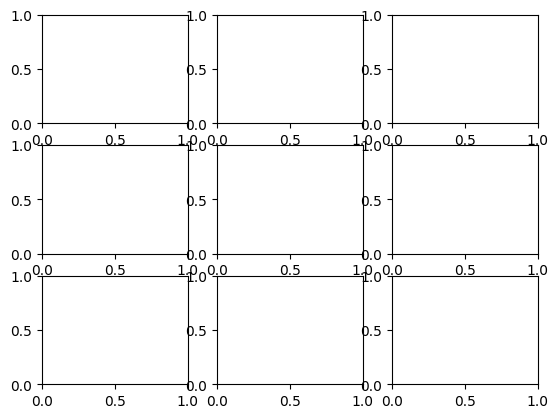

: 

In [97]:
#TODO ditstibution of sentences for each book
import matplotlib.pyplot as plt
